In [1]:
from tensorflow.keras.models import load_model

new_model = load_model('model9543.h5')

In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
def apply_skin_dectection(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # 设定肤色的HSV阈值范围
  lower_skin = np.array([0, 12, 20], dtype=np.uint8)
  upper_skin = np.array([25, 255, 255], dtype=np.uint8)

  # 根据阈值创建肤色掩码
  skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

  kernel = np.ones((2, 2), np.uint8)
  skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
  contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
  return image
def apply_canny_edge_detection(image):
    edges = cv2.Canny(image, 120, 200)  
    return edges

In [4]:

def CheckProbabilities(output):
    class_names=['Paper','Scissors','Rock']
    output_probabilities = np.array(output)
    predicted_class_index = np.argmax(output_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 257ms/step
tf.Tensor([[5.1036526e-02 1.8206141e-06 9.4896173e-01]], shape=(1, 3), dtype=float32)
The predicted class is: Rock


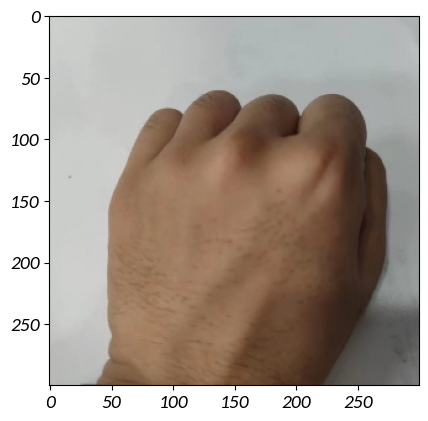

In [5]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei']
font=FontProperties(fname=r".\Carlito-Italic.ttf",size=14)


myimg = cv2.imread("t1.jpg")
myimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2RGB)
plt.yticks(fontproperties = font, size = 14)
plt.xticks(fontproperties = font, size = 14)
plt.imshow(myimg)
myimg = apply_skin_dectection(myimg)
myimg = apply_canny_edge_detection(myimg)
myimg=np.array(myimg).astype('float32')
myimg/=225.
myimg = cv2.resize(myimg,(300,300))
myimg = (np.expand_dims(myimg,0))
myimg.shape

predictions_single = new_model.predict(myimg)
softmax_output = tf.nn.softmax(predictions_single)
print(softmax_output)
CheckProbabilities(softmax_output)

1/1 [==============================] - 0s 29ms/step
tf.Tensor([[9.9746668e-01 1.8749671e-07 2.5331101e-03]], shape=(1, 3), dtype=float32)
The predicted class is: Paper


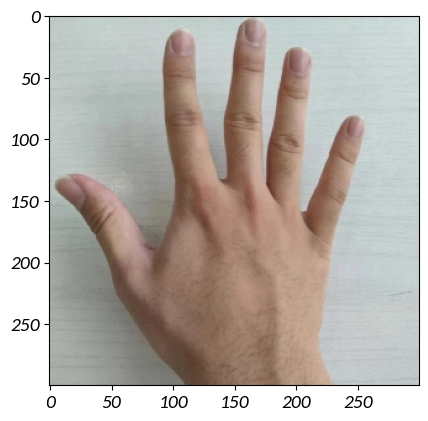

In [6]:
myimg = cv2.imread("t15.png")
myimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2RGB)
plt.yticks(fontproperties = font, size = 14)
plt.xticks(fontproperties = font, size = 14)
plt.imshow(myimg)
myimg = apply_skin_dectection(myimg)
myimg = apply_canny_edge_detection(myimg)
myimg=np.array(myimg).astype('float32')
myimg/=225.
myimg = cv2.resize(myimg,(300,300))
myimg = (np.expand_dims(myimg,0))
myimg.shape

predictions_single = new_model.predict(myimg)
softmax_output = tf.nn.softmax(predictions_single)
print(softmax_output)
CheckProbabilities(softmax_output)